In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | valparaiso
Processing Record 4 of Set 1 | hauterive
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | deniliquin
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | whyalla
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | port-cartier
Processing Record 15 of Set 1 | mishawaka
Processing Record 16 of Set 1 | rafai
Processing Record 17 of Set 1 | mehamn
Processing Record 18 of Set 1 | flin flon
Processing Record 19 of Set 1 | antsohihy
Processing Record 20 of Set 1 | stokmarknes
Processing Record 21 of Set 1 | conceicao do araguaia
Processing Record 22 of Set 1 | ki

Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | hobart
Processing Record 41 of Set 4 | itapirapua
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | sarkand
Processing Record 44 of Set 4 | tapaua
City not found. Skipping...
Processing Record 45 of Set 4 | tazovskiy
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | zaozerne
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | deputatskiy
Processing Record 50 of Set 4 | yarkovo
Processing Record 1 of Set 5 | juifang
City not found. Skipping...
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | omboue
Processing Record 6 of Set 5 | saint-augustin
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | batagay
Processing Record 10 of Set 5 

Processing Record 26 of Set 8 | provideniya
Processing Record 27 of Set 8 | sojat
Processing Record 28 of Set 8 | shu
Processing Record 29 of Set 8 | krechevitsy
Processing Record 30 of Set 8 | veraval
Processing Record 31 of Set 8 | paracatu
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | lincoln
Processing Record 35 of Set 8 | salvador
Processing Record 36 of Set 8 | nakusp
Processing Record 37 of Set 8 | varhaug
Processing Record 38 of Set 8 | alvaraes
Processing Record 39 of Set 8 | amderma
City not found. Skipping...
Processing Record 40 of Set 8 | acarau
Processing Record 41 of Set 8 | jizan
Processing Record 42 of Set 8 | matamoros
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 46 of Set 8 | barwadih
Processing Record 47 of Set 8 | alice springs
Processing Record 48 of Set 8 | krasnozerskoye
Process

Processing Record 14 of Set 12 | moorhead
Processing Record 15 of Set 12 | longlac
City not found. Skipping...
Processing Record 16 of Set 12 | teya
Processing Record 17 of Set 12 | solhan
Processing Record 18 of Set 12 | solnechnyy
Processing Record 19 of Set 12 | torbay
Processing Record 20 of Set 12 | christchurch
Processing Record 21 of Set 12 | banyo
Processing Record 22 of Set 12 | bilma
Processing Record 23 of Set 12 | talcahuano
Processing Record 24 of Set 12 | oliveira dos brejinhos
Processing Record 25 of Set 12 | kerema
Processing Record 26 of Set 12 | xadani
City not found. Skipping...
Processing Record 27 of Set 12 | kawalu
Processing Record 28 of Set 12 | launceston
Processing Record 29 of Set 12 | mackay
Processing Record 30 of Set 12 | gamba
Processing Record 31 of Set 12 | abha
Processing Record 32 of Set 12 | huicheng
Processing Record 33 of Set 12 | diamantino
Processing Record 34 of Set 12 | orcopampa
Processing Record 35 of Set 12 | torrington
Processing Record 36 

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,59.00,56,90,8.99,NZ,2020-04-26 02:50:44
1,Valparaiso,-33.04,-71.63,53.60,87,0,3.36,CL,2020-04-26 02:50:44
2,Hauterive,46.09,3.45,54.00,100,90,2.24,FR,2020-04-26 02:50:45
3,Hermanus,-34.42,19.23,64.00,68,0,7.99,ZA,2020-04-26 02:50:45
4,Deniliquin,-35.53,144.97,66.00,76,44,5.99,AU,2020-04-26 02:50:45
5,Rocha,-34.48,-54.33,62.15,88,100,8.57,UY,2020-04-26 02:47:26
6,Whyalla,-33.03,137.58,68.00,77,40,17.22,AU,2020-04-26 02:50:45
7,Tasiilaq,65.61,-37.64,30.20,74,59,21.92,GL,2020-04-26 02:50:46
8,Ushuaia,-54.80,-68.30,35.60,59,24,3.36,AR,2020-04-26 02:50:40
9,Port Alfred,-33.59,26.89,60.01,92,90,18.86,ZA,2020-04-26 02:50:46


In [6]:
# Reorder columns for csv file
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                                      'Humidity', 'Cloudiness', 'Wind Speed']

reordered_city_data_df = city_data_df[new_column_order]

reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-04-26 02:50:44,-46.19,168.86,59.0,56,90,8.99
1,Valparaiso,CL,2020-04-26 02:50:44,-33.04,-71.63,53.6,87,0,3.36
2,Hauterive,FR,2020-04-26 02:50:45,46.09,3.45,54.0,100,90,2.24
3,Hermanus,ZA,2020-04-26 02:50:45,-34.42,19.23,64.0,68,0,7.99
4,Deniliquin,AU,2020-04-26 02:50:45,-35.53,144.97,66.0,76,44,5.99


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

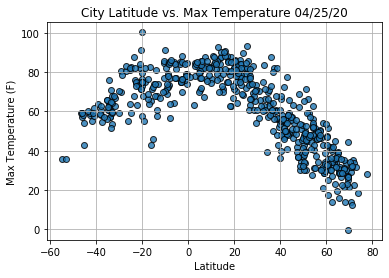

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

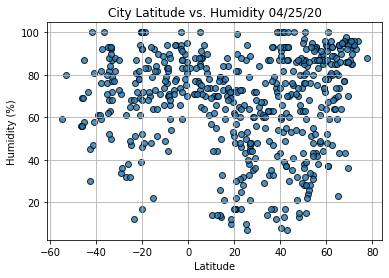

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

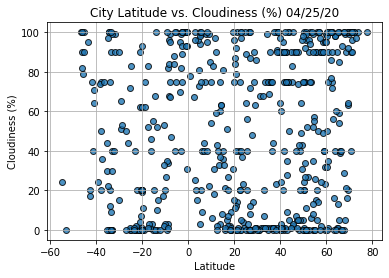

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

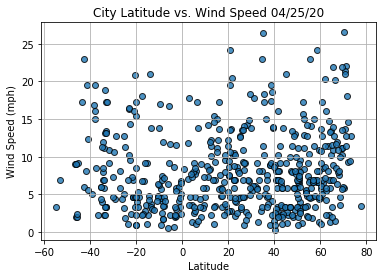

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

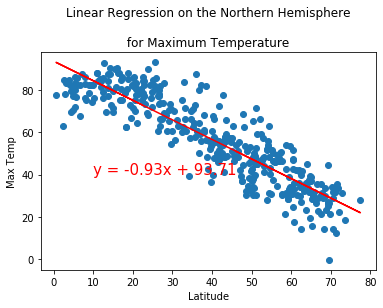

LinregressResult(slope=-0.9262767183750347, intercept=93.71230078283041, rvalue=-0.8932092724053937, pvalue=1.1329975048261422e-134, stderr=0.023857334964714132)

In [64]:
#  Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \n for Maximum Temperature ''', 'Max Temp',(10,40))

linregress(x_values, y_values)

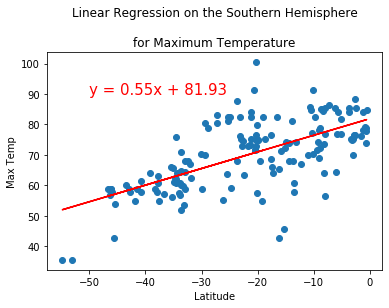

LinregressResult(slope=0.5452874569441009, intercept=81.92655781884088, rvalue=0.6499596949460904, pvalue=3.256986952901837e-20, stderr=0.05121166868671981)

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Southern Hemisphere
                                            \nfor Maximum Temperature''', 'Max Temp',(-50,90))

linregress(x_values, y_values)

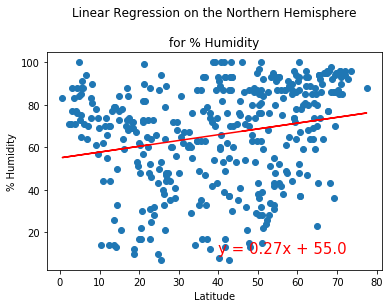

LinregressResult(slope=0.27270245315571384, intercept=54.999393952842524, rvalue=0.22259083820649728, pvalue=1.0675817277298462e-05, stderr=0.06111044892843208)

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \nfor % Humidity''', '% Humidity',(40,10))

linregress(x_values, y_values)

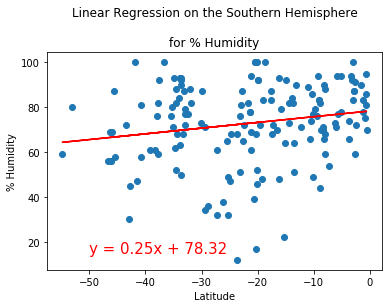

LinregressResult(slope=0.254789826952926, intercept=78.317797191358, rvalue=0.18816471519186365, pvalue=0.018276066441882337, stderr=0.10681944923210418)

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'''Linear Regression on the Southern Hemisphere
                                            \nfor % Humidity''', '% Humidity',(-50,15))

linregress(x_values, y_values)

In [112]:
# Refactor plot_linear_regression function
def plot_linear_regression_2(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print("R-squared: %f" % r_value**2)
    print("P-Value: %f" % p_value)
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.plot(x_values, y_values, 'o', label='Data Points')
    plt.plot(x_values, intercept + slope * x_values, 'r', label='Fitted Line')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="darkred")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    plt.show()

R-squared: 0.024979
P-Value: 0.001893


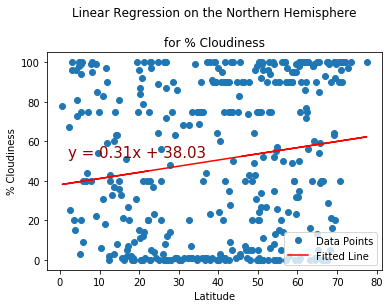

In [113]:
# Linear regression on the Northern Hemisphere for percent of cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_2(x_values, y_values, '''Linear Regression on the Northern Hemisphere
                                            \nfor % Cloudiness''', '% Cloudiness',(2,52))

R-squared: 0.019087
P-Value: 0.084434


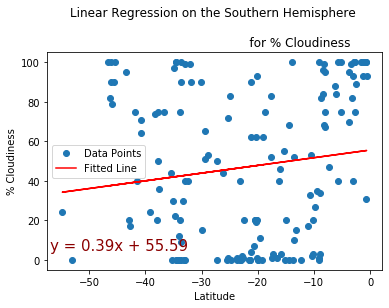

In [140]:
# Linear regression on the Southern Hemisphere for percent of cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_2(x_values, y_values,'''Linear Regression on the Southern Hemisphere \n
                                            for % Cloudiness''', '% Cloudiness',(-57,5))

R-squared: 0.013454
P-Value: 0.023015


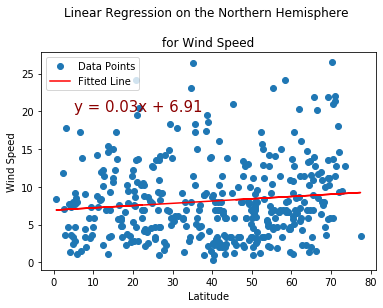

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_2(x_values, y_values, '''Linear Regression on the Northern Hemisphere \n
for Wind Speed''', 'Wind Speed',(5,20))

R-squared: 0.075802
P-Value: 0.000483


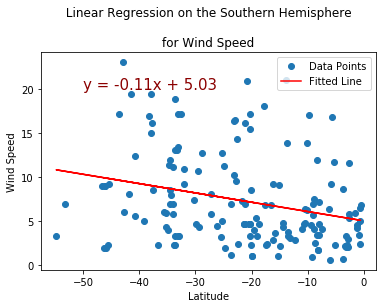

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_2(x_values, y_values, ''' Linear Regression on the Southern Hemisphere \n
for Wind Speed''', 'Wind Speed',(-50,20))